# 치킨 배달 
- source : [백준 15686](https://www.acmicpc.net/problem/15686)
- 난이도 : 골드 V
- 분류 : 구현, 브루트 포스 알고리즘, 백트래킹 

## 문제
- 크기가 N×N인 도시가 있다. 도시는 1×1크기의 칸으로 나누어져 있다. 도시의 각 칸은 빈 칸, 치킨집, 집 중 하나이다. 도시의 칸은 (r, c)와 같은 형태로 나타내고, r행 c열 또는 위에서부터 r번째 칸, 왼쪽에서부터 c번째 칸을 의미한다. r과 c는 1부터 시작한다.

- 이 도시에 사는 사람들은 치킨을 매우 좋아한다. 따라서, 사람들은 "치킨 거리"라는 말을 주로 사용한다. 치킨 거리는 집과 가장 가까운 치킨집 사이의 거리이다. 즉, 치킨 거리는 집을 기준으로 정해지며, 각각의 집은 치킨 거리를 가지고 있다. 도시의 치킨 거리는 모든 집의 치킨 거리의 합이다.

- 임의의 두 칸 (r1, c1)과 (r2, c2) 사이의 거리는 |r1-r2| + |c1-c2|로 구한다.

- 예를 들어, 아래와 같은 지도를 갖는 도시를 살펴보자.

```0 2 0 1 0
1 0 1 0 0
0 0 0 0 0
0 0 0 1 1
0 0 0 1 2
```

- 0은 빈 칸, 1은 집, 2는 치킨집이다.

- (2, 1)에 있는 집과 (1, 2)에 있는 치킨집과의 거리는 |2-1| + |1-2| = 2, (5, 5)에 있는 치킨집과의 거리는 |2-5| + |1-5| = 7이다. 따라서, (2, 1)에 있는 집의 치킨 거리는 2이다.

- (5, 4)에 있는 집과 (1, 2)에 있는 치킨집과의 거리는 |5-1| + |4-2| = 6, (5, 5)에 있는 치킨집과의 거리는 |5-5| + |4-5| = 1이다. 따라서, (5, 4)에 있는 집의 치킨 거리는 1이다.

- 이 도시에 있는 치킨집은 모두 같은 프랜차이즈이다. 프렌차이즈 본사에서는 수익을 증가시키기 위해 일부 치킨집을 폐업시키려고 한다. 오랜 연구 끝에 이 도시에서 가장 수익을 많이 낼 수 있는  치킨집의 개수는 최대 M개라는 사실을 알아내었다.

- 도시에 있는 치킨집 중에서 최대 M개를 고르고, 나머지 치킨집은 모두 폐업시켜야 한다. 어떻게 고르면, 도시의 치킨 거리가 가장 작게 될지 구하는 프로그램을 작성하시오.
    
## 입력
- 첫째 줄에 N(2 ≤ N ≤ 50)과 M(1 ≤ M ≤ 13)이 주어진다.

- 둘째 줄부터 N개의 줄에는 도시의 정보가 주어진다.

- 도시의 정보는 0, 1, 2로 이루어져 있고, 0은 빈 칸, 1은 집, 2는 치킨집을 의미한다. 집의 개수는 2N개를 넘지 않으며, 적어도 1개는 존재한다. 치킨집의 개수는 M보다 크거나 같고, 13보다 작거나 같다.

## 출력
- 첫째 줄에 스타트 팀과 링크 팀의 능력치의 차이의 최솟값을 출력한다.

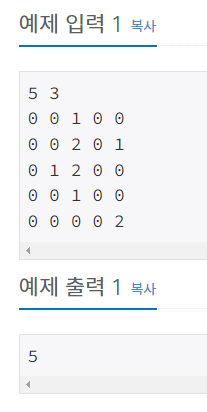

**pseudocode**    
1. m개의 치킨집을 구한다.
2. 도시의 치킨거리를 구한다.
3. 그 중 최소 거리를 출력한다.

In [3]:
n = 5
m = 2

c = [[0, 2, 0, 1, 0],
[1, 0, 1, 0, 0],
[0, 0, 0, 0, 0],
[2, 0, 0, 1, 1],
[2, 2, 0, 1, 2]]

# 출력 : 10

In [1]:
from itertools import combinations

In [5]:
ck_list = [] # 치킨집의 위치
for i in range(5):
    for j in range(5):
        if c[i][j] == 2:
            ck_list.append((i, j))

print(ck_list)
print(len(ck_list))

[(0, 1), (3, 0), (4, 0), (4, 1), (4, 4)]
5


In [7]:
m_ck = list(combinations(ck_list, m)) # m개의 치킨집 조합
print(m_ck)

[((0, 1), (3, 0)), ((0, 1), (4, 0)), ((0, 1), (4, 1)), ((0, 1), (4, 4)), ((3, 0), (4, 0)), ((3, 0), (4, 1)), ((3, 0), (4, 4)), ((4, 0), (4, 1)), ((4, 0), (4, 4)), ((4, 1), (4, 4))]


In [8]:
house_list = [] # 집의 위치
for i in range(5):
    for j in range(5):
        if c[i][j] == 1:
            house_list.append((i, j))

print(house_list)
print(len(house_list))

[(0, 3), (1, 0), (1, 2), (3, 3), (3, 4), (4, 3)]
6


- 치킨집 조합을 돌면서 각 조합별 도시의 치킨거리를 구한다.

In [21]:
city_dists = [] 
for i in range(len(m_ck)):  # 조합 케이스 
    city_dist = 0
    for j in range(len(house_list)): # 각 집의 치킨거리를 구한다.
        min_dist = 50
        rh, ch = house_list[j]
        for j in m_ck[i]:
            rc, cc = j
            if (abs(rh-rc) + abs(ch-cc)) <= min_dist:
                min_dist = abs(rh-rc) + abs(ch-cc)
        city_dist += min_dist # 모든 집의 치킨거리를 누적시킨다 = 도시의 치킨거리
    
    city_dists.append(city_dist)
        
print(min(city_dists))

10


**첫 번째 시도**

In [22]:
import sys
from itertools import combinations

n, m = map(int, sys.stdin.readline().split())
c = []
for i in range(n):
    c.append(list(map(int, sys.stdin.readline().split())))

ck_list = [] # 치킨집의 위치
for i in range(n):
    for j in range(n):
        if c[i][j] == 2:
            ck_list.append((i, j))
            
m_ck = list(combinations(ck_list, m)) # m개의 치킨집 조합

house_list = [] # 집의 위치
for i in range(n):
    for j in range(n):
        if c[i][j] == 1:
            house_list.append((i, j))
        
city_dists = [] 
for i in range(len(m_ck)):  # 조합 케이스 
    city_dist = 0
    for j in range(len(house_list)): # 각 집의 치킨거리를 구한다.
        min_dist = 50
        rh, ch = house_list[j]
        for j in m_ck[i]:
            rc, cc = j
            if (abs(rh-rc) + abs(ch-cc)) <= min_dist:
                min_dist = abs(rh-rc) + abs(ch-cc)
        city_dist += min_dist # 모든 집의 치킨거리를 누적시킨다 = 도시의 치킨거리
    
    city_dists.append(city_dist)
        
print(min(city_dists))

10


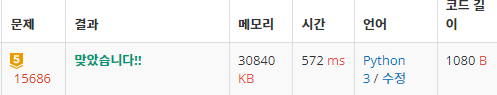

- dfs와 라이브러리 속도 비교를 해봐야겠다..!